##Conexion

In [28]:
!pip install PyDrive
!pip install --upgrade category_encoders

In [29]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [30]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [31]:
from google.colab import files

In [32]:
id_train_labels = '1o8fEed65R8219m5iOJoZgvHXaTGwWE4H'
id_train_values = "1RCoa3FWbpcHVC6imhaQQFQEAWNW0qkh0" 
id_test_values = '1xBGPZbt3BYxe1OOYGMJuGnXe_pEqFZ1a'
id_submission_format = "1ei8BhsAAhZpZ8sRqEOVGl12y0JAPdXGV"
test_values_preproces = "15vqsNBrPvvbSktrooSfFPTC0xGtsXQRO"
train_values_features = "1at2XJDiaGCqWCtqQ7pCqLrD7hcnWZ34X"

downloaded_train_labels = drive.CreateFile({'id': id_train_labels})
downloaded_train_values = drive.CreateFile({'id': id_train_values})
downloaded_test_values = drive.CreateFile({'id': id_test_values})
downloaded_submission_format = drive.CreateFile({'id': id_submission_format})
downloaded_test_values_preproces = drive.CreateFile({'id': test_values_preproces})
downloaded_train_values_features = drive.CreateFile({'id': train_values_features})

In [33]:

downloaded_train_labels.GetContentFile('train_labels.csv')
downloaded_train_values.GetContentFile('train_values.csv')
downloaded_test_values.GetContentFile('test_values.csv')
downloaded_submission_format.GetContentFile('submission_format.csv')
downloaded_test_values_preproces.GetContentFile('test_values_preproces.csv')
downloaded_train_values_features.GetContentFile('train_values_features.csv')

In [34]:

train_values = pd.read_csv('train_values.csv', dtype={
    'building_id': 'int64', 'geo_level_1_id': 'int64',
    'geo_level_2_id': 'int64', 'geo_level_3_id': 'int64',
    'count_floors_pre_eq': 'int8', 'age': 'int32',
    'area_percentage': 'int32', 'height_percentage': 'int32',
    'land_surface_condition': 'category', 'foundation_type': 'category',
    'roof_type': 'category', 'ground_floor_type': 'category', 'other_floor_type': 'category',
    'position': 'category', 'plan_configuration': 'category', 'has_superstructure_adobe_mud': 'int8',
    'has_superstructure_mud_mortar_stone': 'int8', 'has_superstructure_stone_flag': 'int8',
    'has_superstructure_cement_mortar_stone': 'int8', 'has_superstructure_mud_mortar_brick': 'int8',
    'has_superstructure_cement_mortar_brick': 'int8', 'has_superstructure_timber': 'int8',
    'has_superstructure_bamboo': 'int8', 'has_superstructure_rc_non_engineered': 'int8',
    'has_superstructure_rc_engineered': 'int8', 'has_superstructure_other': 'int8',
    'has_superstructure_other': 'int8', 'legal_ownership_status': 'category',
    'has_secondary_use': 'bool', 'has_secondary_use_agriculture': 'bool',
    'has_secondary_use_hotel': 'bool', 'has_secondary_use_rental': 'bool',
    'has_secondary_use_institution': 'bool', 'has_secondary_use_school': 'bool',
    'has_secondary_use_industry': 'bool', 'has_secondary_use_health_post': 'bool',
    'has_secondary_use_gov_office': 'bool', 'has_secondary_use_use_police': 'bool',
    'has_secondary_use_other': 'bool', 'count_families': 'int8'
})
train_labels = pd.read_csv('train_labels.csv', dtype={
    'damage_grade': 'int16'
})

test_values = pd.read_csv('test_values.csv', dtype={
  'building_id': 'int64', 'geo_level_1_id': 'int64',
    'geo_level_2_id': 'int64', 'geo_level_3_id': 'int64',
    'count_floors_pre_eq': 'int8', 'age': 'int32',
    'area_percentage': 'int32', 'height_percentage': 'int32',
    'land_surface_condition': 'category', 'foundation_type': 'category',
    'roof_type': 'category', 'ground_floor_type': 'category', 'other_floor_type': 'category',
    'position': 'category', 'plan_configuration': 'category', 'has_superstructure_adobe_mud': 'int8',
    'has_superstructure_mud_mortar_stone': 'int8', 'has_superstructure_stone_flag': 'int8',
    'has_superstructure_cement_mortar_stone': 'int8', 'has_superstructure_mud_mortar_brick': 'int8',
    'has_superstructure_cement_mortar_brick': 'int8', 'has_superstructure_timber': 'int8',
    'has_superstructure_bamboo': 'int8', 'has_superstructure_rc_non_engineered': 'int8',
    'has_superstructure_rc_engineered': 'int8', 'has_superstructure_other': 'int8',
    'has_superstructure_other': 'int8', 'legal_ownership_status': 'category',
    'has_secondary_use': 'bool', 'has_secondary_use_agriculture': 'bool',
    'has_secondary_use_hotel': 'bool', 'has_secondary_use_rental': 'bool',
    'has_secondary_use_institution': 'bool', 'has_secondary_use_school': 'bool',
    'has_secondary_use_industry': 'bool', 'has_secondary_use_health_post': 'bool',
    'has_secondary_use_gov_office': 'bool', 'has_secondary_use_use_police': 'bool',
    'has_secondary_use_other': 'bool', 'count_families': 'int8'
})

test_values_preproces = pd.read_csv('test_values_preproces.csv')
train_values_features = pd.read_csv('train_values_features.csv')


In [35]:
train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,False,False,False,False,False,False,False,False,False,False,False


In [36]:
labels_and_values = pd.merge(
    train_labels, train_values, how='inner', on='building_id')

In [37]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='multiclass', random_state=5)


##Filtrando Data Set

In [38]:
labels_and_values = labels_and_values[labels_and_values['age']!=995]

In [39]:
test_values_preproces = test_values_preproces[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq',
       'age', 'area_percentage', 'height_percentage',
       'land_surface_condition_0', 'land_surface_condition_1',
       'land_surface_condition_2', 'foundation_type_0', 'foundation_type_1',
       'foundation_type_2', 'foundation_type_3', 'plan_configuration_0',
       'plan_configuration_1', 'plan_configuration_2', 'plan_configuration_3',
       'plan_configuration_4', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'binning_age','volume_percentage']]

In [40]:
train_values_features = train_values_features[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq',
       'age', 'area_percentage', 'height_percentage',
       'land_surface_condition_0', 'land_surface_condition_1',
       'land_surface_condition_2', 'foundation_type_0', 'foundation_type_1',
       'foundation_type_2', 'foundation_type_3', 'plan_configuration_0',
       'plan_configuration_1', 'plan_configuration_2', 'plan_configuration_3',
       'plan_configuration_4', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'binning_age','volume_percentage']]

In [41]:
damage_prediction = labels_and_values['damage_grade']

##Creacion del Set de Entrenamiento y Test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train_values_features, damage_prediction, test_size=0.2, random_state=45)

##LGBM

In [56]:
from lightgbm import LGBMClassifier as lgb
import matplotlib.pyplot as plt



lgbm = LGBMClassifier(objective="multiclass",
        num_class=3,
        metric="multi_error",
        boosting= 'gbdt',
        max_depth= 115,
        num_leaves= 190,
        n_estimators= 1000,
        learning_rate=  0.1,
        feature_fraction= 0.5,
        min_sum_hessian_in_leaf= 0.1,
        max_bin=8192,
        verbosity= 1,
        num_threads=6,
        seed= 1)

lgbm.fit(X_train, y_train)

LGBMClassifier(boosting='gbdt', boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_bin=8192,
               max_depth=115, metric='multi_error', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0,
               min_sum_hessian_in_leaf=0.1, n_estimators=1000, n_jobs=-1,
               num_class=3, num_leaves=190, num_threads=6,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, seed=1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbosity=1)

In [57]:
predicciones = lgbm.predict(X_test)

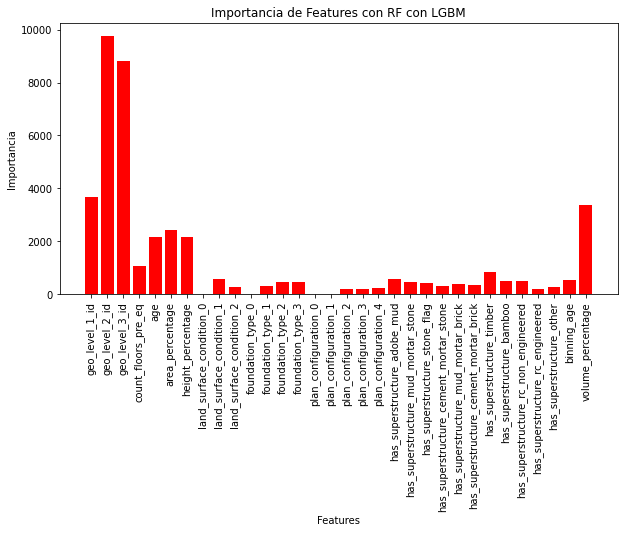

In [45]:

plt.subplots(figsize=(10,5))
plt.bar(X_train.columns, lgbm.feature_importances_, color = 'red')
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia de Features con RF con LGBM')
plt.xticks(rotation=90)

plt.show() 

In [55]:
f1_score(predicciones, y_test, average='micro')

0.731053372682908

##GridSearch

In [47]:
features = ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [49]:
"""gridParams = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [24,40,70,150],
    'num_leaves': [24,27,33,40], # 
    'colsample_bytree' : [0.63, 0.65],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2],
    }
    
## GridSearch con K-Fold Cross Validation
grid = GridSearchCV(lgbm, gridParams, verbose=1, cv=3, n_jobs=-1)
# Run the grid
grid.fit(train_values_features, damage_prediction)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)"""

"gridParams = {\n    'learning_rate': [0.05, 0.1],\n    'n_estimators': [24,40,70,150],\n    'num_leaves': [24,27,33,40], # \n    'colsample_bytree' : [0.63, 0.65],\n    'reg_alpha' : [1,1.2],\n    'reg_lambda' : [1,1.2],\n    }\n    \n## GridSearch con K-Fold Cross Validation\ngrid = GridSearchCV(lgbm, gridParams, verbose=1, cv=3, n_jobs=-1)\n# Run the grid\ngrid.fit(train_values_features, damage_prediction)\n\n# Print the best parameters found\nprint(grid.best_params_)\nprint(grid.best_score_)"

##Submission

In [50]:
pred_train = lgbm.predict(test_values_preproces)

In [51]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')

In [52]:
my_submission = pd.DataFrame(data=pred_train,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [53]:
my_submission.to_csv('submission.csv')

In [54]:
#files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>